# Registration Comparison

In this notebook, we will compare a registered brain produced by CPAC, and a registered brain produced by FNGS.

## Quantification

To quantify overlap, we consider the Jaccard Index:

\begin{equation}
    J(A, B) = \frac{|A \cap B|}{|A \cup B|}
\end{equation}

We will consider the Jaccard Index of all permutations of arbitrarily selected volumes: the 0th, 20th, 50th, 80th, 110th, 140th, 170th, and 200th volumes (total of $6 \cdot 8 = 48$ overlaps). 

Note that CPAC does not provide us the self registered anatomical brain. Therefore, we will exclusively consider the template registered brain for comparisons.

## Notes about procedure

Note that for our Jaccard Index to be meaningful, we must first skullstrip our inputs. We will use FSL's BET with a 0.3 tolerance, with the robust option selected to ensure that we get a good quality Brain extraction. To validate that our brain extraction quality is not impacting our results, we will show qualitative plots to confirm that our BET worked.

# Self Registration

Self registration is the procedure of aligning the 4D functional volume to a 3D anatomical scan for the same subject. For self registration, we will consider the overlap of the bet'd respective slices to the anatomical brain.

## Brain Extraction

Here, we extract the brain from the afformentioned slices, and plot one example of the particular slice with its respective extracted brain to demonstrate success. We also plot an example of the extracted brain overlapped with the anatomical image we were supposed to be aligning to:

In [29]:
%matplotlib nbagg
import ndmg
import ndmg.utils as mgu
from ndmg.stats.qa_reg import plot_overlays
from ndmg.stats.func_qa_utils import percent_overlap
import nibabel as nb
import matplotlib
import numpy as np

matplotlib = reload(matplotlib)
matplotlib.use('GTK', force=True)

anat = '/home/eric/cmp/fngs/outputs/tmp/sub-0025864_ses-1_T1w_resamp.nii.gz'
anat_im = nb.load(anat)
anat_dat = anat_im.get_data()

fngs_sreg_base = '/home/eric/cmp/fngs/outputs/tmp/sub-0025864_ses-1_bold_preproc_self-aligned'
fngs_sreg = '{}.nii.gz'.format(fngs_sreg_base)
reg_im = nb.load(fngs_sreg)
reg_dat = reg_im.get_data()
slices = [0, 19, 49, 79, 109, 139, 169, 199]
fngs_sl_sreg = []
fngs_sl_sreg_brain = []
for (i, sl) in enumerate(slices):
    new_reg = "{}_{}.nii.gz".format(fngs_sreg_base, i)
    new_reg_brain = "{}_{}_brain.nii.gz".format(fngs_sreg_base, i)
    new_dat = reg_dat[:,:,:,sl]
    fngs_sl_sreg.append(new_reg)
    nb.save(img=nb.Nifti1Image(dataobj=new_dat, header=reg_im.header, affine=reg_im.affine),
            filename=new_reg)
    mgu.extract_brain(new_reg, new_reg_brain, opts='-f 0.3 -R')
    fngs_sl_sreg_brain.append(new_reg_brain)


Executing: bet /home/eric/cmp/fngs/outputs/tmp/sub-0025864_ses-1_bold_preproc_self-aligned_0.nii.gz /home/eric/cmp/fngs/outputs/tmp/sub-0025864_ses-1_bold_preproc_self-aligned_0_brain.nii.gz -f 0.3 -R
Executing: bet /home/eric/cmp/fngs/outputs/tmp/sub-0025864_ses-1_bold_preproc_self-aligned_1.nii.gz /home/eric/cmp/fngs/outputs/tmp/sub-0025864_ses-1_bold_preproc_self-aligned_1_brain.nii.gz -f 0.3 -R
Executing: bet /home/eric/cmp/fngs/outputs/tmp/sub-0025864_ses-1_bold_preproc_self-aligned_2.nii.gz /home/eric/cmp/fngs/outputs/tmp/sub-0025864_ses-1_bold_preproc_self-aligned_2_brain.nii.gz -f 0.3 -R
Executing: bet /home/eric/cmp/fngs/outputs/tmp/sub-0025864_ses-1_bold_preproc_self-aligned_3.nii.gz /home/eric/cmp/fngs/outputs/tmp/sub-0025864_ses-1_bold_preproc_self-aligned_3_brain.nii.gz -f 0.3 -R
Executing: bet /home/eric/cmp/fngs/outputs/tmp/sub-0025864_ses-1_bold_preproc_self-aligned_4.nii.gz /home/eric/cmp/fngs/outputs/tmp/sub-0025864_ses-1_bold_preproc_self-aligned_4_brain.nii.gz -f 0.

<IPython.core.display.Javascript object>


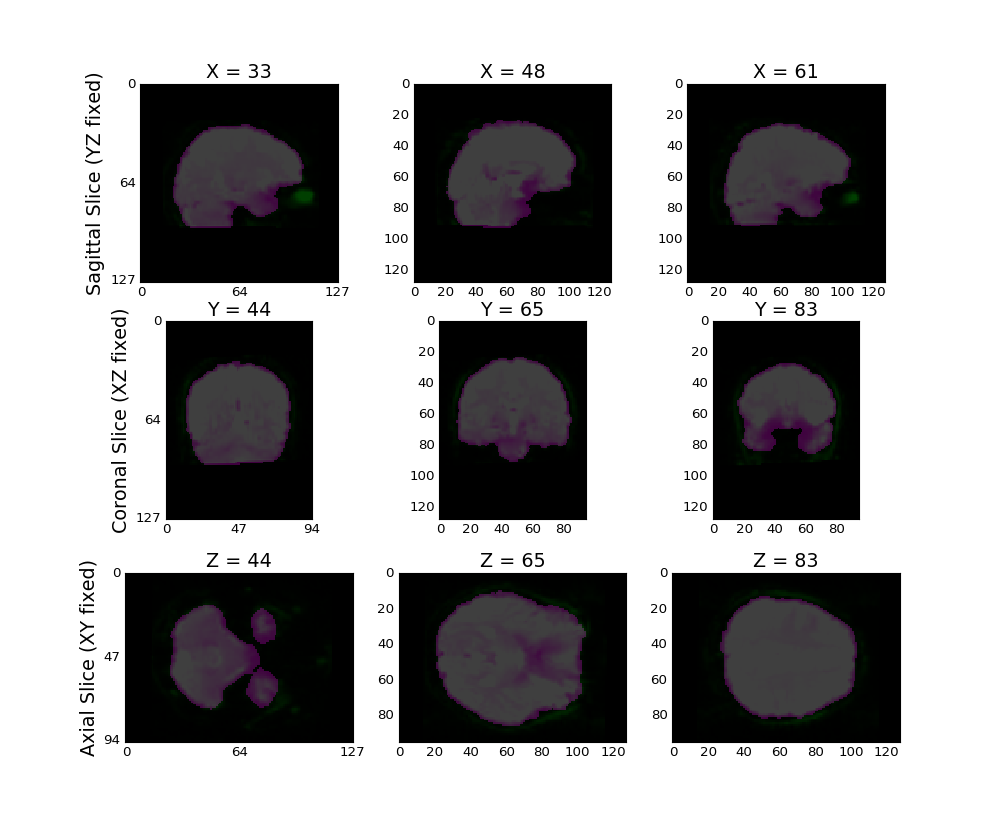

In [28]:
matplotlib.use('GTK', force=True)
fig = plot_overlays((nb.load(fngs_sl_sreg_brain[0]).get_data() != 0).astype(float), nb.load(fngs_sl_sreg[0]).get_data())
fig.show()

(95, 128, 128)


<IPython.core.display.Javascript object>


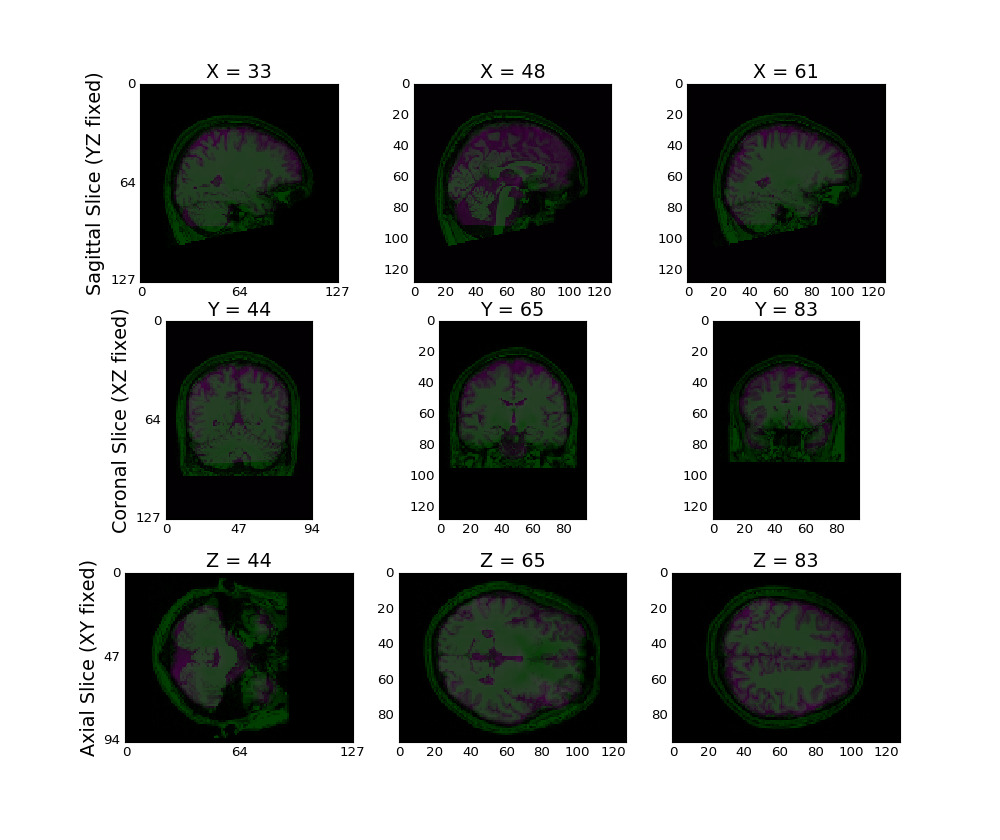

In [26]:

anat = '/home/eric/cmp/fngs/outputs/tmp/sub-0025864_ses-1_T1w_resamp.nii.gz'
anat_im = nb.load(anat)
anat_dat = anat_im.get_data()
anat_br = '/home/eric/cmp/fngs/outputs/tmp/sub-0025864_ses-1_T1w_brain.nii.gz'
anat_br_dat = nb.load(anat_br).get_data()
fig = plot_overlays(nb.load(fngs_sl_sreg_brain[0]).get_data(), anat_dat)
fig.show()

# Visualization

Next, we will visualize the Jaccard Index of all possible permutations of the masks from the afformentioned slices with respect to each tool's motion corrected output:

<IPython.core.display.Javascript object>


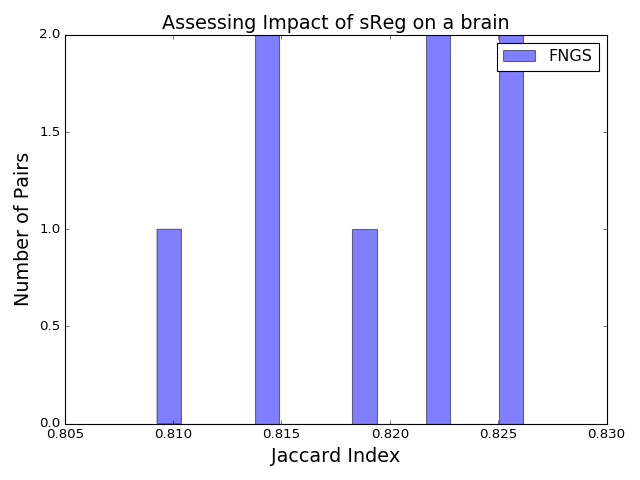

In [36]:
fngs_jac = []
for slout in fngs_sl_sreg_brain:
    fngs_jac.append(percent_overlap(nb.load(slout).get_data(), anat_br_dat))
        
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(fngs_jac, bins=15, alpha=0.5, label='FNGS')
ax.set_xlabel('Jaccard Index')
ax.set_ylabel('Number of Pairs')
ax.set_title('Assessing Impact of sReg on a brain')
ax.legend()
fig.tight_layout()
fig.show()

## Template Registration

Template registration is the procedure of aligning the 4D functional volume to a 3D anatomical template. For template registration, we will consider the overlap of the bet'd respective slices to the MNI152 template brain.

In [66]:
temp = '/home/eric/atlases/atlas/MNI152_T1-2mm.nii.gz'
temp_dat = nb.load(temp).get_data()
temp_br = '/home/eric/atlases/atlas/MNI152_T1-2mm_brain.nii.gz'
temp_br_dat = nb.load(temp_br).get_data()

fngs_treg_base = '/home/eric/cmp/fngs/outputs/reg/func/align/sub-0025864_ses-1_bold_aligned'
fngs_treg = '{}.nii.gz'.format(fngs_treg_base)
reg_im = nb.load(fngs_treg)
reg_dat = reg_im.get_data()
slices = [0, 19, 49, 79, 109, 139, 169, 199]
fngs_sl_treg = []
fngs_sl_treg_brain = []
for (i, sl) in enumerate(slices):
    new_reg = "{}_{}.nii.gz".format(fngs_treg_base, i)
    new_reg_brain = "{}_{}_brain.nii.gz".format(fngs_treg_base, i)
    new_dat = reg_dat[:,:,:,sl]
    fngs_sl_treg.append(new_reg)
    nb.save(img=nb.Nifti1Image(dataobj=new_dat, header=reg_im.header, affine=reg_im.affine),
            filename=new_reg)
    mgu.extract_brain(new_reg, new_reg_brain, opts='-f 0.5 -R')
    fngs_sl_treg_brain.append(new_reg_brain)


Executing: bet /home/eric/cmp/fngs/outputs/reg/func/align/sub-0025864_ses-1_bold_aligned_0.nii.gz /home/eric/cmp/fngs/outputs/reg/func/align/sub-0025864_ses-1_bold_aligned_0_brain.nii.gz -f 0.5 -R
Executing: bet /home/eric/cmp/fngs/outputs/reg/func/align/sub-0025864_ses-1_bold_aligned_1.nii.gz /home/eric/cmp/fngs/outputs/reg/func/align/sub-0025864_ses-1_bold_aligned_1_brain.nii.gz -f 0.5 -R
Executing: bet /home/eric/cmp/fngs/outputs/reg/func/align/sub-0025864_ses-1_bold_aligned_2.nii.gz /home/eric/cmp/fngs/outputs/reg/func/align/sub-0025864_ses-1_bold_aligned_2_brain.nii.gz -f 0.5 -R
Executing: bet /home/eric/cmp/fngs/outputs/reg/func/align/sub-0025864_ses-1_bold_aligned_3.nii.gz /home/eric/cmp/fngs/outputs/reg/func/align/sub-0025864_ses-1_bold_aligned_3_brain.nii.gz -f 0.5 -R
Executing: bet /home/eric/cmp/fngs/outputs/reg/func/align/sub-0025864_ses-1_bold_aligned_4.nii.gz /home/eric/cmp/fngs/outputs/reg/func/align/sub-0025864_ses-1_bold_aligned_4_brain.nii.gz -f 0.5 -R
Executing: bet 

<IPython.core.display.Javascript object>


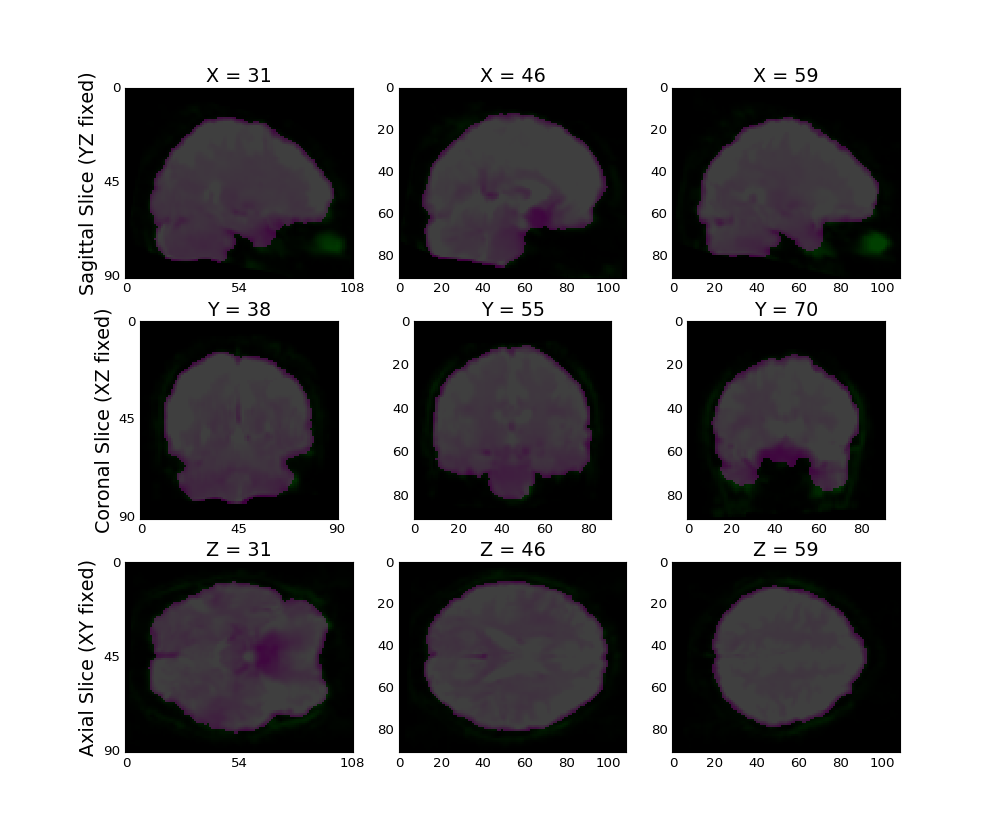

In [67]:
matplotlib.use('GTK', force=True)
fig = plot_overlays((nb.load(fngs_sl_treg_brain[0]).get_data() != 0).astype(float), nb.load(fngs_sl_treg[0]).get_data())
fig.show()

<IPython.core.display.Javascript object>


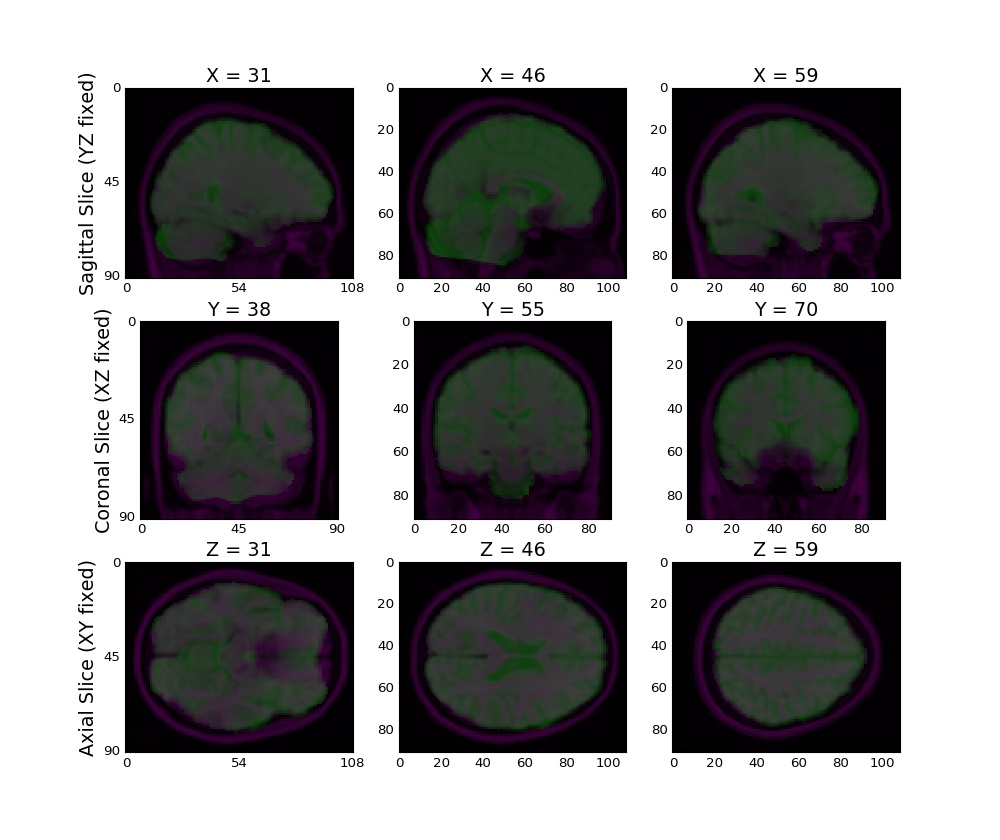

In [68]:
fig = plot_overlays(temp_dat, nb.load(fngs_sl_treg_brain[0]).get_data())
fig.show()

In [52]:
cpac_treg_base = '/home/eric/cmp/cpac/pipeline_HCPtest/sub-0025864_ses-1/mean_functional_in_mni/_scan_rest_1_rest/sub-0025864_ses-1_bold_calc_tshift_resample_volreg_calc_tstat_warp'
cpac_treg = '{}.nii.gz'.format(cpac_treg_base)
cpac_treg_brain = '{}_brain.nii.gz'.format(cpac_treg_base)
cpac_treg_dat = nb.load(cpac_treg).get_data()
cpac_treg_br_dat = nb.load(cpac_treg_brain).get_data()
mgu.extract_brain(cpac_treg, cpac_treg_brain, opts='-f 0.3 -R')

Executing: bet /home/eric/cmp/cpac/pipeline_HCPtest/sub-0025864_ses-1/mean_functional_in_mni/_scan_rest_1_rest/sub-0025864_ses-1_bold_calc_tshift_resample_volreg_calc_tstat_warp.nii.gz /home/eric/cmp/cpac/pipeline_HCPtest/sub-0025864_ses-1/mean_functional_in_mni/_scan_rest_1_rest/sub-0025864_ses-1_bold_calc_tshift_resample_volreg_calc_tstat_warp_brain.nii.gz -f 0.3 -R


<IPython.core.display.Javascript object>


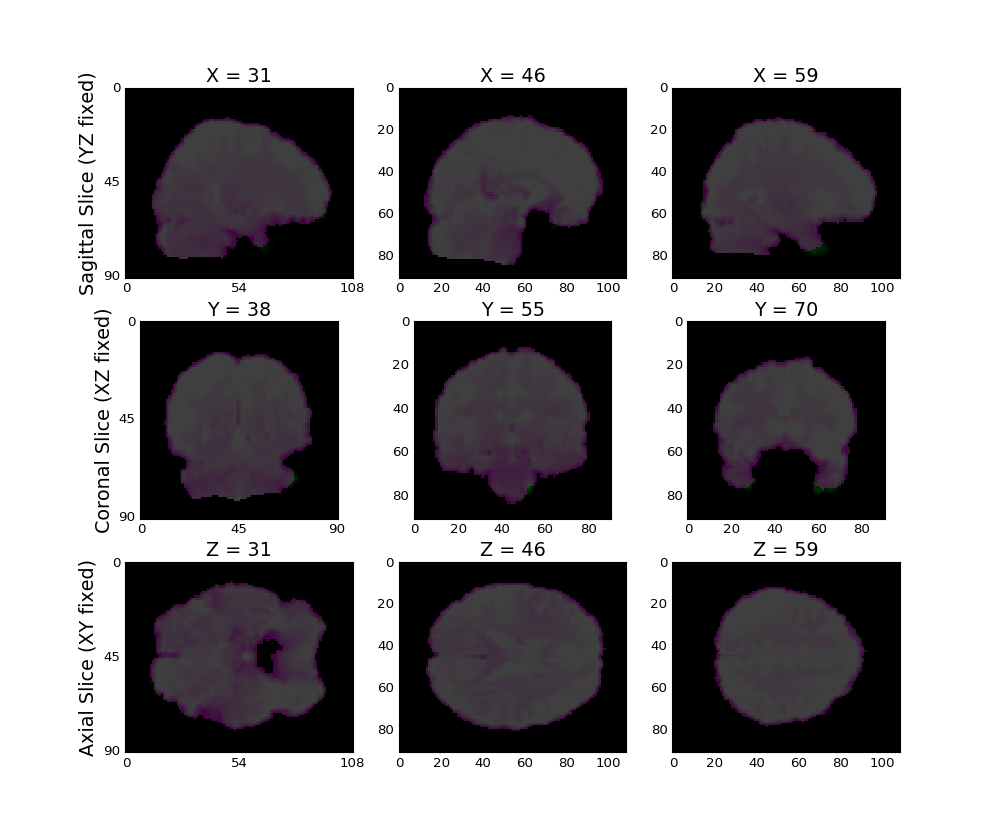

In [56]:
matplotlib.use('GTK', force=True)
fig = plot_overlays((cpac_treg_br_dat > 0).astype(float), cpac_treg_dat)
fig.show()

<IPython.core.display.Javascript object>


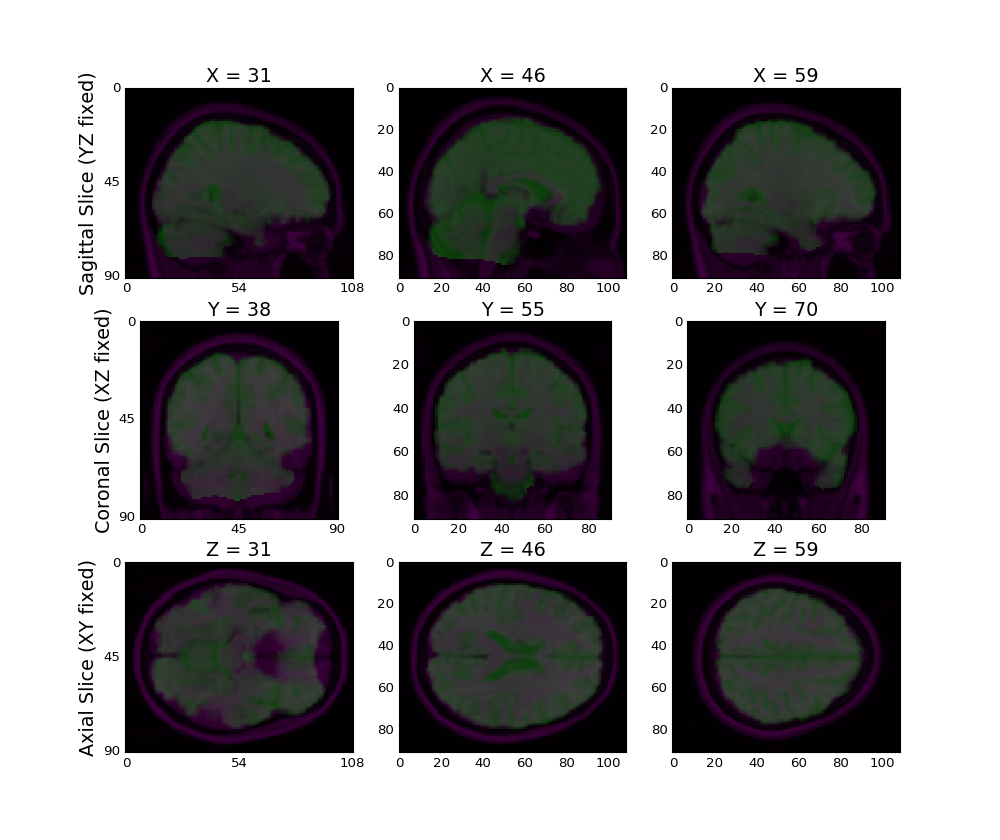

In [57]:
fig = plot_overlays(temp_dat, cpac_treg_br_dat)
fig.show()

<IPython.core.display.Javascript object>


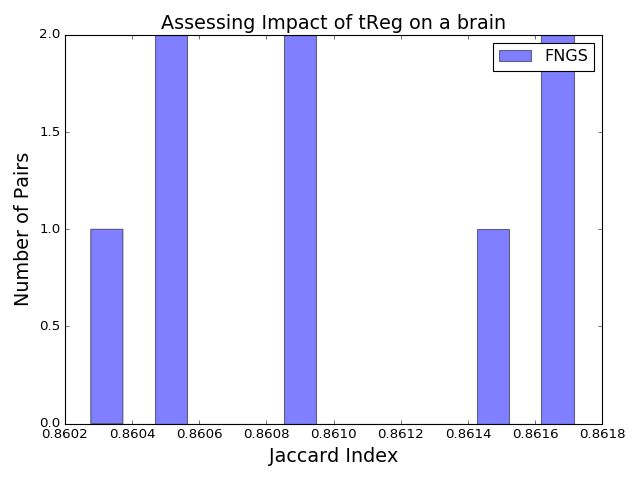

In [69]:
fngs_jac = []
for slout in fngs_sl_treg_brain:
        fngs_jac.append(percent_overlap(nb.load(slout).get_data(), temp_br_dat))

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(fngs_jac, bins=15, alpha=0.5, label='FNGS')
ax.set_xlabel('Jaccard Index')
ax.set_ylabel('Number of Pairs')
ax.set_title('Assessing Impact of tReg on a brain')
ax.legend()
fig.tight_layout()
fig.show()

In [70]:
print("FNGS mean: {}".format(np.mean(fngs_jac)))

FNGS mean: 0.860990797579


In [71]:
print("CPAC mean: {}".format(percent_overlap(cpac_treg_br_dat, temp_br_dat)))

CPAC mean: 0.859308035898
